In [1]:
# Grupo 2 de practicas aprendizaje automatico
# Practica 2
# Samuel Fernandez Fernandez (100432070) y Carlos Garcia Garcia (100432251)
# Fichero del modelo

# Importamos las librerias a utilizar
import numpy as np
import pandas as pd
import time
from sklearn.metrics import pairwise_distances_argmin, silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import tracemalloc


In [2]:
# PUNTO 1. Programamos nuestra versión del KMeans y lo comparamos frente al de sklearn mediante clusters ficticios (make_blobs)

# Decorador para medir el tiempo y la memoria utilizada por las funciones
def measure_time_and_memory(func):
    def wrapper(*args, **kwargs):
        tracemalloc.start()
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        print(f"Tiempo de ejecución ({func.__name__}): {end_time - start_time:.4f} segundos")
        print(f"Memoria máxima usada: {peak / 10**6:.4f} MB")
        return result
    return wrapper

@measure_time_and_memory
def run_kmeans(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=100432070)
    kmeans.fit(X)
    return kmeans

@measure_time_and_memory
def custom_k_means(X, n_clusters, max_iter=300, tol=1e-4, random_state=100432070):
    np.random.seed(random_state)
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
    for i in range(max_iter):
        labels = pairwise_distances_argmin(X, centroids)
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(n_clusters)])
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) <= tol):
            break
        centroids = new_centroids
    return centroids, labels

Tiempo de ejecución (custom_k_means): 0.0110 segundos
Memoria máxima usada: 0.0255 MB
Tiempo de ejecución (custom_k_means): 0.0182 segundos
Memoria máxima usada: 0.0191 MB
Tiempo de ejecución (custom_k_means): 0.0000 segundos
Memoria máxima usada: 0.0188 MB
Tiempo de ejecución (custom_k_means): 0.0156 segundos
Memoria máxima usada: 0.0189 MB
Tiempo de ejecución (custom_k_means): 0.0499 segundos
Memoria máxima usada: 0.0194 MB
Tiempo de ejecución (custom_k_means): 0.0496 segundos
Memoria máxima usada: 0.0196 MB


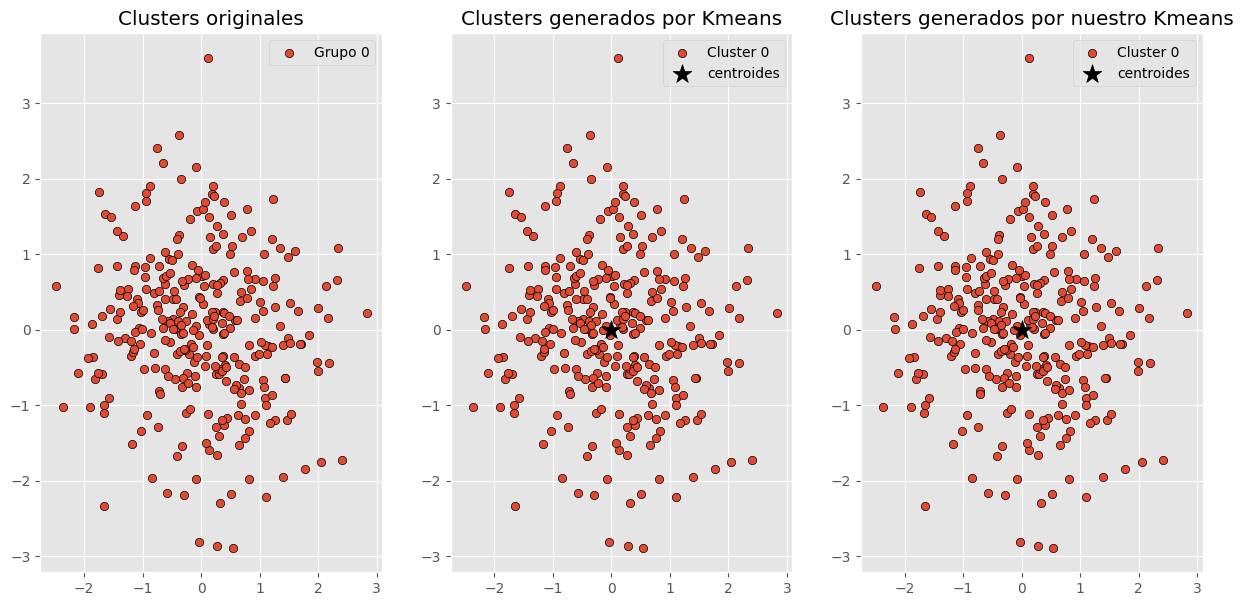

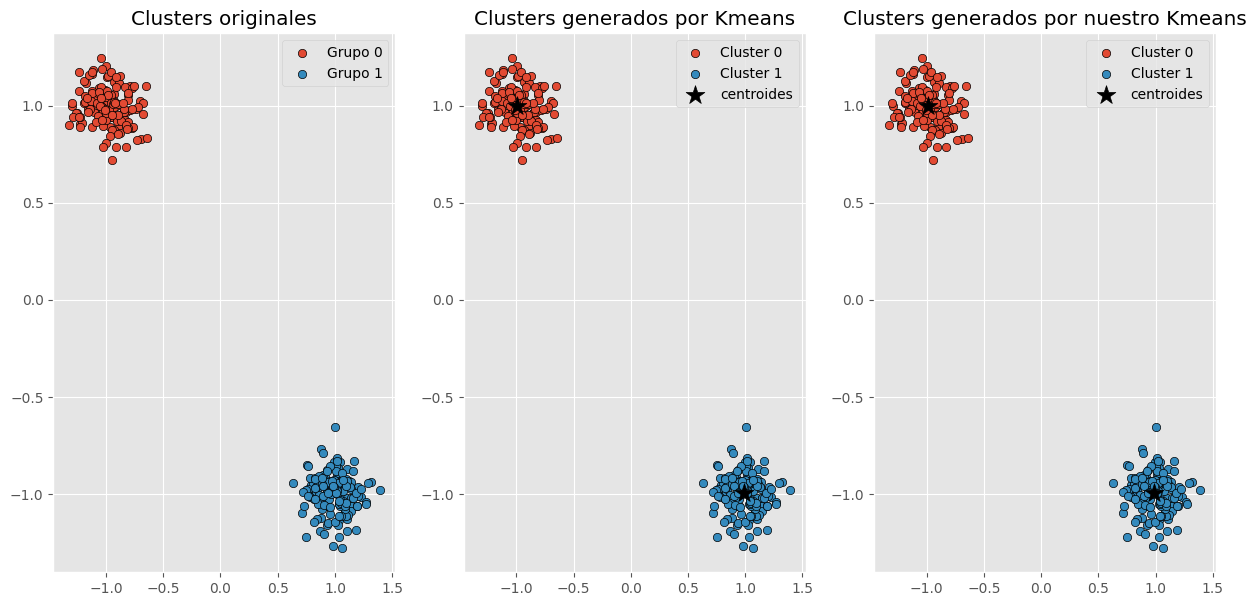

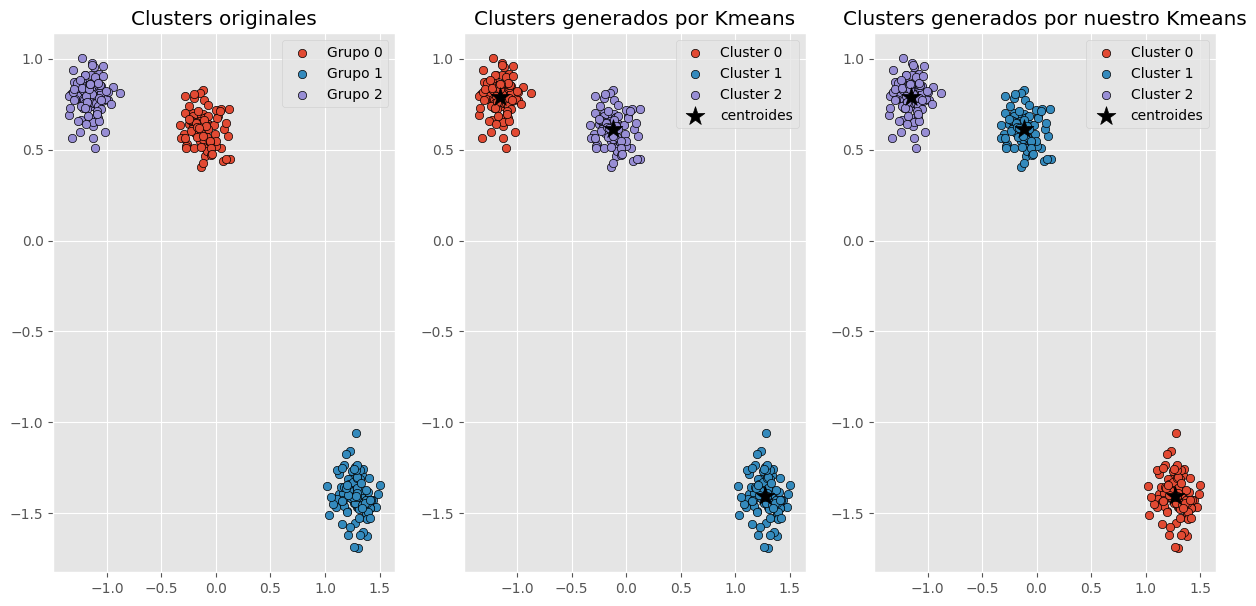

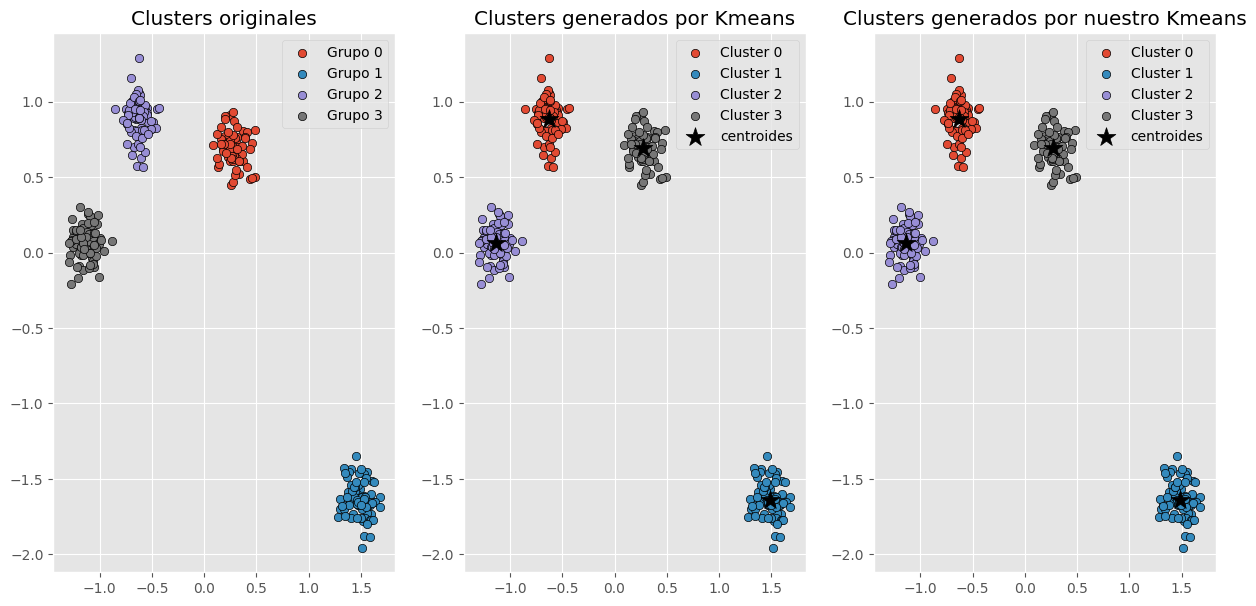

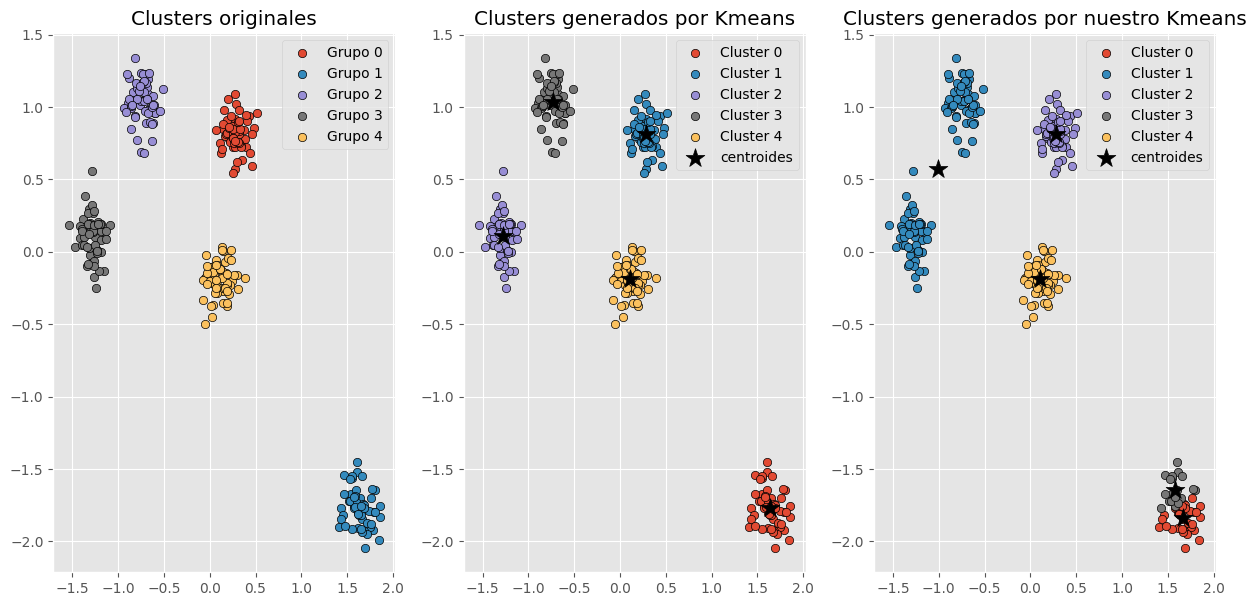

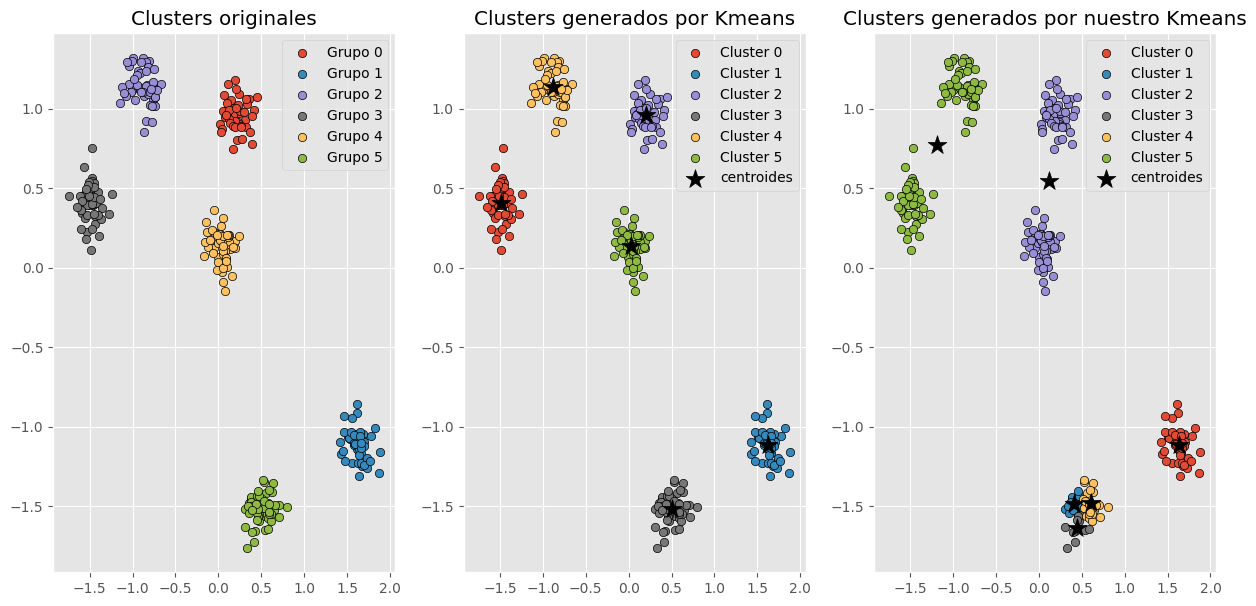

In [3]:
#Vamos a comparar el rendimiento del método KMeans de sklearn vs el creado por nosotros

# Simulación de datos
for k in range(1,7):
    X, y = make_blobs(
        n_samples    = 300,
        n_features   = 2,
        centers      = k,
        cluster_std  = 0.6,
        shuffle      = True,
        random_state = 100432070
    )
    
    # Escalado de datos
    X_scaled = scale(X)

    # Generamos el modelo
    modelo_kmeans = KMeans(n_clusters=k, n_init=25, random_state=100432070)
    modelo_kmeans.fit(X=X_scaled)

    # Clasificación con el modelo kmeans
    y_predict = modelo_kmeans.predict(X=X_scaled)

    # Generamos el modelo nuestro
    modelo_kmeans_custom = custom_k_means(X=X_scaled, n_clusters=k, random_state=100432070)

    # Clasificacion con el modelo nuestro
    a,b = modelo_kmeans_custom

    # Representación gráfica: grupos originales vs clusters creados (sklearn) vs clusters creados (custom kmeans)
    fig, ax = plt.subplots(1, 3, figsize=(15, 7))

    # Grupos originales
    for i in np.unique(y):
        ax[0].scatter(
            x = X_scaled[y == i, 0],
            y = X_scaled[y == i, 1],
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
            marker    = 'o',
            edgecolor = 'black',
            label= f"Grupo {i}"
        )

    ax[0].set_title('Clusters originales')
    ax[0].legend()

    # Clusters creados por KMeans (sklearn)
    for i in np.unique(y_predict):
        ax[1].scatter(
            x = X_scaled[y_predict == i, 0],
            y = X_scaled[y_predict == i, 1],
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
            marker    = 'o',
            edgecolor = 'black',
            label= f"Cluster {i}"
        )

    ax[1].scatter(
        x = modelo_kmeans.cluster_centers_[:, 0],
        y = modelo_kmeans.cluster_centers_[:, 1],
        c = 'black',
        s = 200,
        marker = '*',
        label  = 'centroides'
    )
    ax[1].set_title('Clusters generados por Kmeans')
    ax[1].legend()

    # Clusters creados por KMeans (nosotros)
    for i in np.unique(b):
        ax[2].scatter(
            x = X_scaled[b == i, 0],
            y = X_scaled[b == i, 1],
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
            marker    = 'o',
            edgecolor = 'black',
            label= f"Cluster {i}"
        )

    ax[2].scatter(
        x = a[:, 0],
        y = a[:, 1],
        c = 'black',
        s = 200,
        marker = '*',
        label  = 'centroides'
    )
    ax[2].set_title('Clusters generados por nuestro Kmeans')
    ax[2].legend()

Tiempo de ejecución (custom_k_means): 0.0577 segundos
Memoria máxima usada: 0.0189 MB
Tiempo de ejecución (custom_k_means): 0.0688 segundos
Memoria máxima usada: 0.0211 MB
Tiempo de ejecución (custom_k_means): 0.0313 segundos
Memoria máxima usada: 0.0189 MB
Tiempo de ejecución (custom_k_means): 0.0158 segundos
Memoria máxima usada: 0.0189 MB
Tiempo de ejecución (custom_k_means): 0.0313 segundos
Memoria máxima usada: 0.0217 MB
Tiempo de ejecución (custom_k_means): 0.0433 segundos
Memoria máxima usada: 0.0193 MB


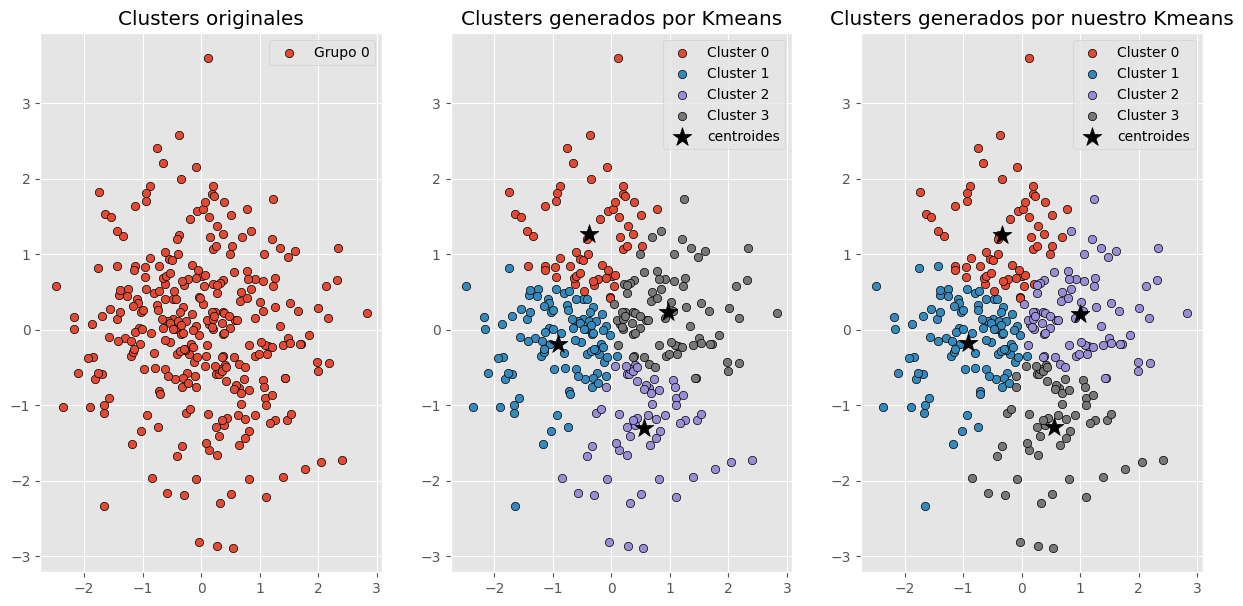

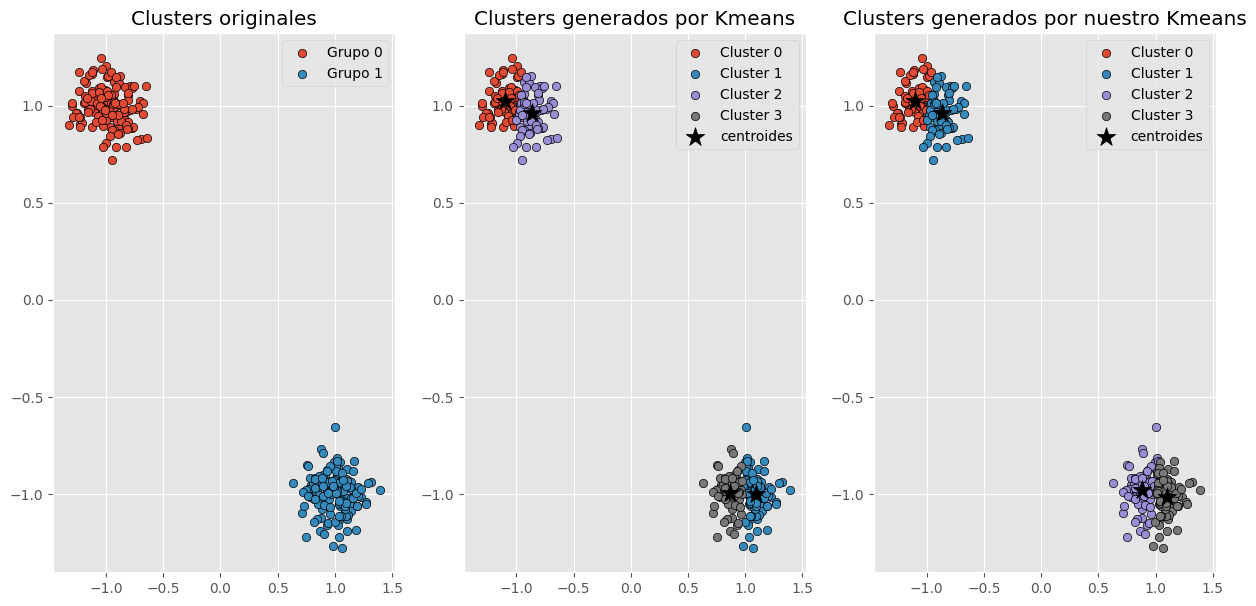

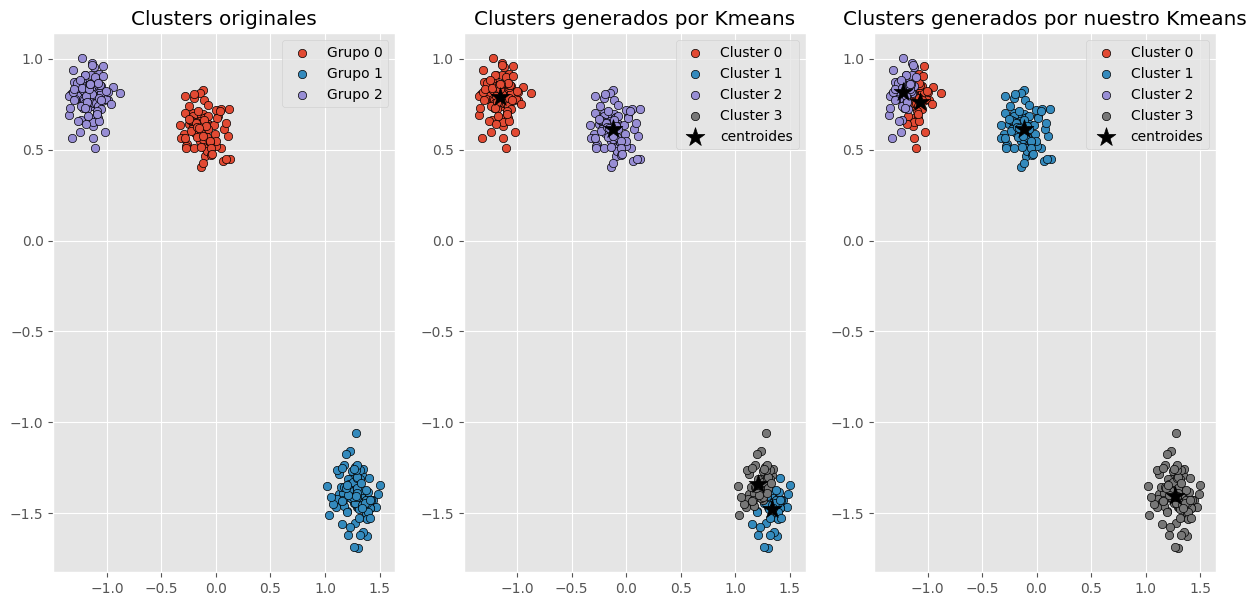

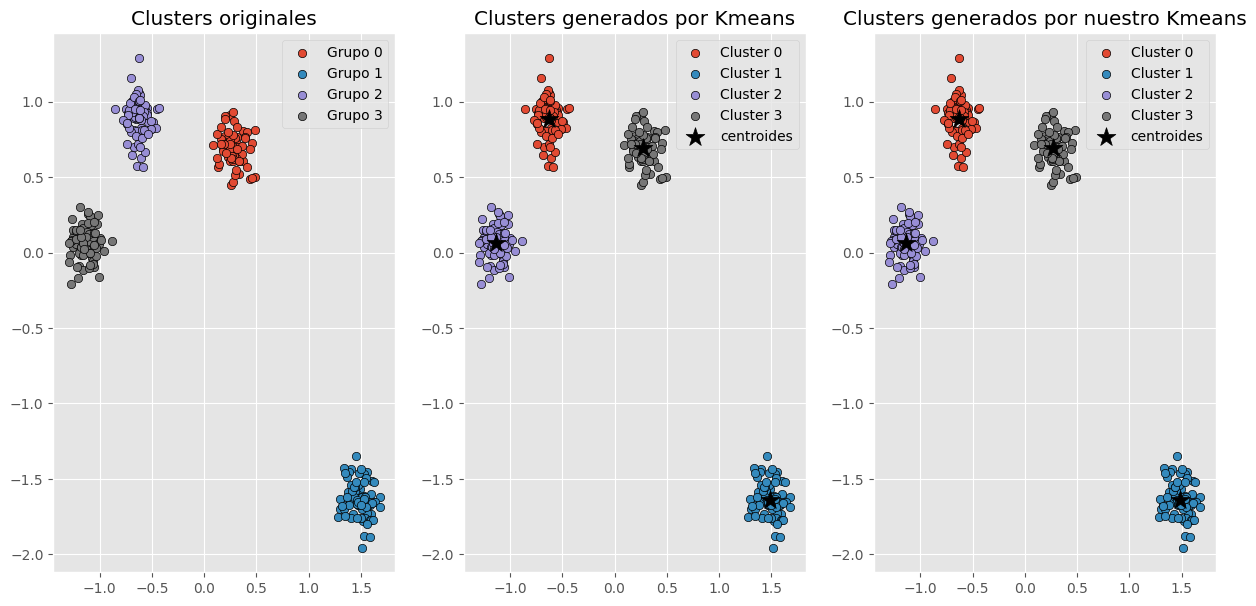

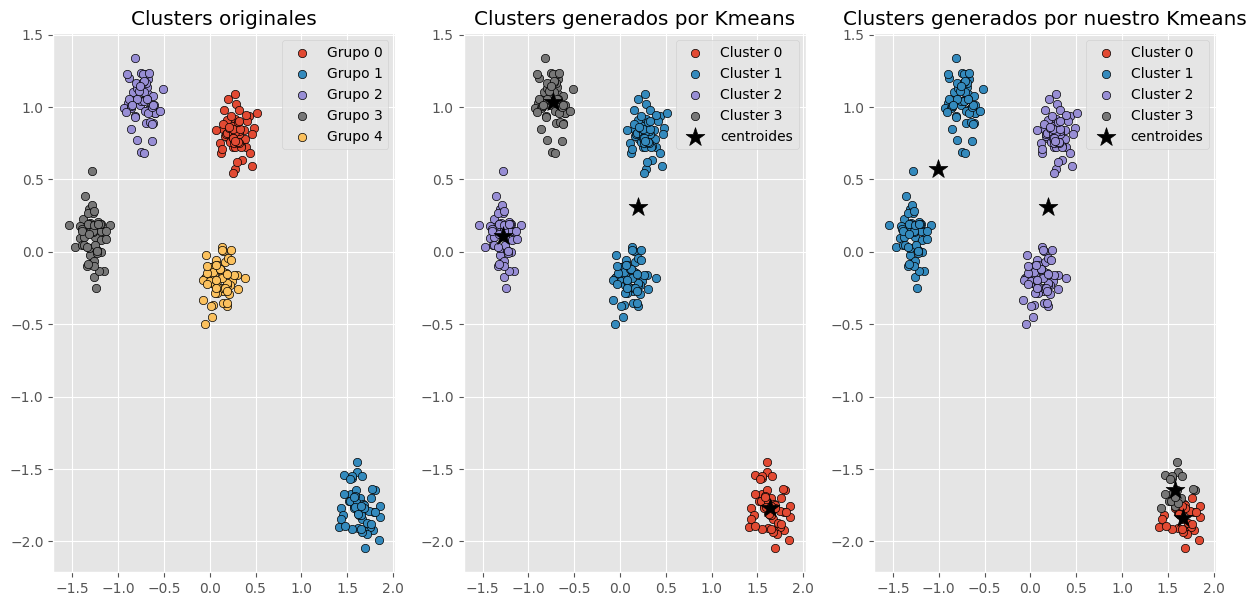

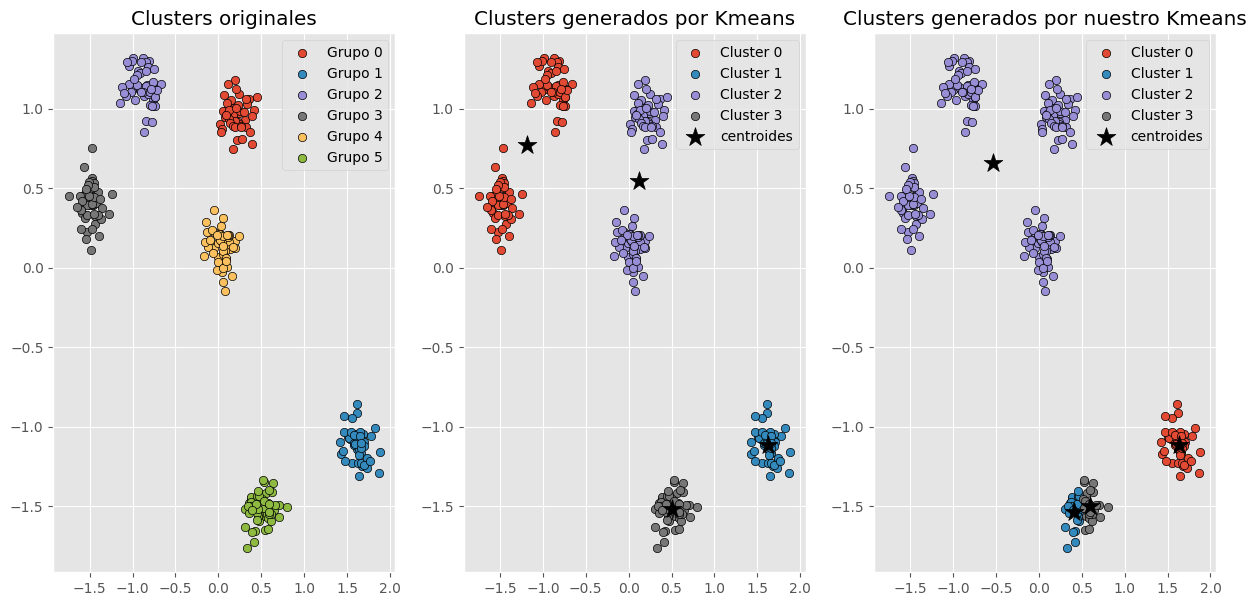

In [4]:
for k in range(1,7):
    X, y = make_blobs(
        n_samples    = 300,
        n_features   = 2,
        centers      = k,
        cluster_std  = 0.6,
        shuffle      = True,
        random_state = 100432070
    )
    
    # Escalado de datos
    X_scaled = scale(X)

    # Generamos el modelo
    modelo_kmeans = KMeans(n_clusters=4, n_init=25, random_state=100432070)
    modelo_kmeans.fit(X=X_scaled)

    # Clasificación con el modelo kmeans
    y_predict = modelo_kmeans.predict(X=X_scaled)

    # Generamos el modelo nuestro
    modelo_kmeans_custom = custom_k_means(X=X_scaled, n_clusters=4, random_state=100432070)

    # Clasificacion con el modelo nuestro
    a,b = modelo_kmeans_custom

    # Representación gráfica: grupos originales vs clusters creados (sklearn) vs clusters creados (custom kmeans)
    fig, ax = plt.subplots(1, 3, figsize=(15, 7))

    # Grupos originales
    for i in np.unique(y):
        ax[0].scatter(
            x = X_scaled[y == i, 0],
            y = X_scaled[y == i, 1],
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
            marker    = 'o',
            edgecolor = 'black',
            label= f"Grupo {i}"
        )

    ax[0].set_title('Clusters originales')
    ax[0].legend()

    # Clusters creados por KMeans (sklearn)
    for i in np.unique(y_predict):
        ax[1].scatter(
            x = X_scaled[y_predict == i, 0],
            y = X_scaled[y_predict == i, 1],
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
            marker    = 'o',
            edgecolor = 'black',
            label= f"Cluster {i}"
        )

    ax[1].scatter(
        x = modelo_kmeans.cluster_centers_[:, 0],
        y = modelo_kmeans.cluster_centers_[:, 1],
        c = 'black',
        s = 200,
        marker = '*',
        label  = 'centroides'
    )
    ax[1].set_title('Clusters generados por Kmeans')
    ax[1].legend()

    # Clusters creados por KMeans (nosotros)
    for i in np.unique(b):
        ax[2].scatter(
            x = X_scaled[b == i, 0],
            y = X_scaled[b == i, 1],
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
            marker    = 'o',
            edgecolor = 'black',
            label= f"Cluster {i}"
        )

    ax[2].scatter(
        x = a[:, 0],
        y = a[:, 1],
        c = 'black',
        s = 200,
        marker = '*',
        label  = 'centroides'
    )
    ax[2].set_title('Clusters generados por nuestro Kmeans')
    ax[2].legend()

Nuestro método de kmeans funciona correctamente cuando hay pocos clusters. Cuando hay más de 4 se lía y hace cosas extrañas, como coger 2 grupos en 1 cluster y dividir lo que sería un grupo en varios clusters.

De la misma manera, tampoco se comporta de la misma manera que el Kmeans de sklearn cuando no coincide el n_clusters con los centroides originales. En algunos casos, selecciona los mismos clusters y en otros coge clusters muy grandes y clusters muy pequeños.

Esto hace que nuestro método dependa mucho del número de centroides originales y de que coincidan con el n_clusters que le pasemos nosotros, por lo que no es tan fiable como el método de sklearn.

Sin embargo, en términos de rapidez y memoria es notablemente más eficiente que el KMeans de sklearn, así que al menos algo bueno tiene.

In [5]:
#PUNTO 2.	Tenemos variables categóricas (Color, Clase Espectral). Tenemos dos posibilidades: (a) codificar con one-hot-encoding; (b) codificar como una variable ordinal.
# Tener en cuenta que el color está asociado a la cantidad de energía, y algo parecido con la clase espectral.

# Primero nos aseguramos de ver que nuestro dataset no tiene valores faltantes ni valores extraños
# Cargando los datos
stars_data_path = 'Stars2.csv'  
stars_data = pd.read_csv(stars_data_path)

# Información general del dataset inicial
print("Información general del dataset incial:")
stars_data.info()

# Identificación de variables numéricas y categóricas
num_vars = stars_data.select_dtypes(include=[np.number]).columns.tolist()
cat_vars = stars_data.select_dtypes(include=['object']).columns.tolist()

# Verificación de valores faltantes por variable
missing_values = stars_data.isnull().sum()

# Identificación de columnas constantes
constant_columns = [col for col in stars_data.columns if stars_data[col].nunique() == 1]

print(f"\nNúmero de variables numéricas: {len(num_vars)}")
print(f"Número de variables categóricas: {len(cat_vars)}")
print(f"\nVariables con valores faltantes:\n{missing_values[missing_values > 0]}")
print(f"\nColumnas constantes: {constant_columns}")

Información general del dataset incial:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 11.4+ KB

Número de variables numéricas: 4
Número de variables categóricas: 2

Variables con valores faltantes:
Series([], dtype: int64)

Columnas constantes: []


In [6]:
# Ahora tenemos que renombrar algunas variables para quedarnos con las que debería haber en las categóricas (Color y Spectral_Class)
# Esto nos servirá a la hora de aplicar una codificación ordinal. Vamos a ver cuantos datos diferentes tenemos
 
# loop for counting the unique
visited = []
for j in (stars_data['Color'], stars_data['Spectral_Class']):
    cnt = 0
    visited.clear()
    for i in range(0, len(j)):
        if j[i] not in visited:
            visited.append(j[i])
            cnt += 1
    print("Número de valores únicos:",cnt)
    print("Valores únicos :",visited)

Número de valores únicos: 17
Valores únicos : ['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white', 'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish', 'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish', 'Yellowish', 'Orange-Red', 'Blue-White']
Número de valores únicos: 7
Valores únicos : ['M', 'B', 'A', 'F', 'O', 'K', 'G']


In [7]:
# Codificamos de las 2 maneras que nos pide el enunciado: one-hot y ordinal
# Función para aplicar codificación one-hot
def apply_one_hot_encoding(data_frame, columns):
    encoder = OneHotEncoder()
    encoded_data = encoder.fit_transform(data_frame[columns])
    encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out())  
    new_df = pd.concat([data_frame.drop(columns, axis=1), encoded_df], axis=1)
    return new_df

# Función para aplicar codificación ordinal
def apply_ordinal_encoding(data_frame, mappings):
    for column, mapping in mappings.items():
        data_frame[column] = data_frame[column].map(mapping).astype(int)
    return data_frame

# Unificando variantes de nombres para 'Color'
color_replacements = {'yellowish': 'Yellowish', 'white': 'White', 'Blue White': 'Blue-white',
    'Blue white': 'Blue-white', 'Blue-White': 'Blue-white'}
stars_data['Color'] = stars_data['Color'].replace(color_replacements)

# Codificación ordinal existente
ordinal_mappings = {
    "Color": {"Red": 0, "Orange-Red": 1, "Orange": 2, "Pale yellow orange": 3,
        "Yellowish": 4, "yellow-white": 5, "Whitish": 6, "Yellowish White": 7,
        "White-Yellow": 8, "White": 9, "Blue-white": 10, "Blue": 11},
    "Spectral_Class": {"O": 0, "B": 1, "A": 2, "F": 3, "G": 4, "K": 5, "M": 6}
}

# Aplicando codificación ordinal
stars_data_ordinal = apply_ordinal_encoding(stars_data.copy(), ordinal_mappings)

# Aplicando codificación one-hot
stars_data_one_hot = apply_one_hot_encoding(stars_data, ['Color', 'Spectral_Class'])

# Guardando las codificaciones
stars_data_ordinal.to_csv("stars_data_ordinal.csv", index=False)
stars_data_one_hot.to_csv("stars_data_one_hot.csv", index=False)

In [8]:
# Verificamos que hemos codificado las nuevas variables correctamente
visited = []
 
# loop for counting the unique
for j in (stars_data_ordinal['Color'], stars_data_ordinal['Spectral_Class']):
    cnt = 0
    visited.clear()
    for i in range(0, len(j)):
        if j[i] not in visited:
            visited.append(j[i])
            cnt += 1
    print("Número de valores únicos en 'Color' :",cnt)
    print("Valores únicos :",visited)

Número de valores únicos en 'Color' : 12
Valores únicos : [0, 10, 9, 7, 3, 11, 6, 5, 2, 8, 4, 1]
Número de valores únicos en 'Color' : 7
Valores únicos : [6, 1, 2, 3, 0, 5, 4]


In [9]:
# Podemos también imprimir una lista con todas las variables que se forman al aplicar one hot
visited = []
 
# loop for counting the unique
for j in (stars_data['Color'], stars_data['Spectral_Class']):
    cnt = 0
    visited.clear()
    for i in range(0, len(j)):
        if j[i] not in visited:
            visited.append(j[i])
            cnt += 1
    print("Número de valores únicos:",cnt)
    print("Valores únicos :",visited)

Número de valores únicos: 12
Valores únicos : ['Red', 'Blue-white', 'White', 'Yellowish White', 'Pale yellow orange', 'Blue', 'Whitish', 'yellow-white', 'Orange', 'White-Yellow', 'Yellowish', 'Orange-Red']
Número de valores únicos: 7
Valores únicos : ['M', 'B', 'A', 'F', 'O', 'K', 'G']


In [10]:
#PUNTO 3.	Aplicar diferentes algoritmos de clustering comparando y discutiendo los resultados que se obtienen de ellos (al menos dos métodos)
# Empezamos con el ordinal
# Preparar datos
scaler = StandardScaler()
X_ordinal_scaled = scaler.fit_transform(stars_data_ordinal)
X_ordinal_scaled = pd.DataFrame(X_ordinal_scaled, columns=stars_data_ordinal.columns, index=stars_data_ordinal.index)
np.set_printoptions(precision=2)

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 dimensiones para visualización
X_ordinal_pca = pca.fit_transform(X_ordinal_scaled)
df_ordinal_pca = pd.DataFrame(X_ordinal_pca, columns=['PC1','PC2'])

# Vemos cuanto explica cada componente
ordinal_std = df_ordinal_pca.describe().transpose()["std"]
print(f"Proporción de varianza explicada: {pca.explained_variance_ratio_}")
print(f"Proporción acumulada: {np.cumsum(pca.explained_variance_ratio_)}")

Proporción de varianza explicada: [0.55 0.3 ]
Proporción acumulada: [0.55 0.85]


C:\Users\carlo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


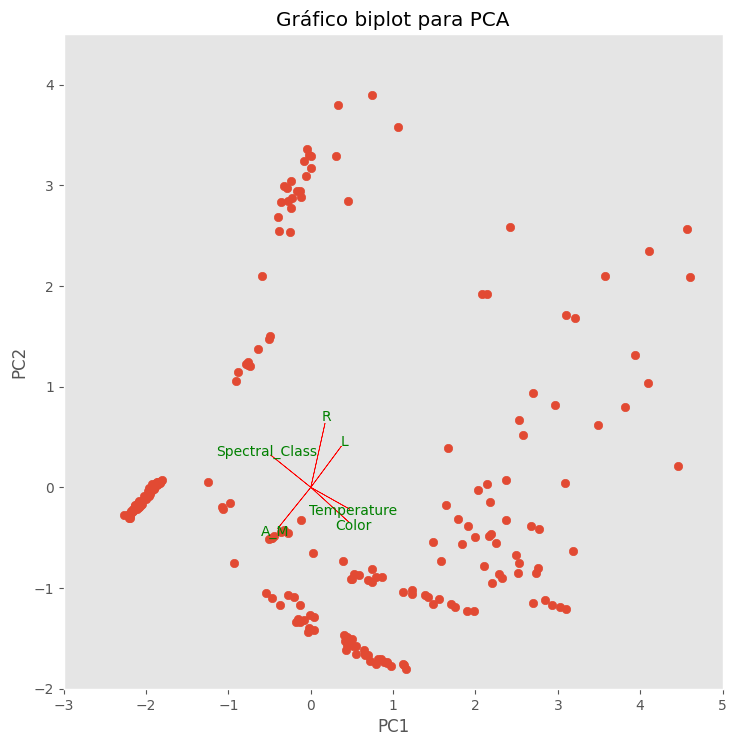

In [11]:
# Función para dibujar un gráfico biplot
def biplot(scaled_data, fitted_pca, original_dim_labels):

    pca_results = fitted_pca.transform(scaled_data)
    pca1_scores = pca_results[:,0]
    pca2_scores = pca_results[:,1]

    # plot each point in 2D post-PCA space
    plt.scatter(pca1_scores,pca2_scores)

    #for each original dimension, plot what an increase of 1 in that dimension means in this space
    for i in range(fitted_pca.components_.shape[1]):
        raw_dims_delta_on_pca1 = fitted_pca.components_[0,i]
        raw_dims_delta_on_pca2 = fitted_pca.components_[1,i]
        plt.arrow(0, 0, raw_dims_delta_on_pca1, raw_dims_delta_on_pca2 ,color = 'r',alpha = 1)
        plt.text(raw_dims_delta_on_pca1*1.1, raw_dims_delta_on_pca2*1.1, original_dim_labels[i], color = 'g', ha = 'center', va = 'center')

plt.figure(figsize=(8.5,8.5))
plt.xlim(-3,5)
plt.ylim(-2,4.5)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("Gráfico biplot para PCA")
plt.grid()
biplot(X_ordinal_scaled, PCA().fit(scaler.fit_transform(X_ordinal_scaled)),
       original_dim_labels=stars_data_ordinal.columns)

In [12]:
# Y ahora el mismo procedimiento para el one hot
# Preparar datos
X_one_hot_scaled = scaler.fit_transform(stars_data_one_hot)
X_one_hot_scaled = pd.DataFrame(X_one_hot_scaled, columns=stars_data_one_hot.columns, index=stars_data_one_hot.index)
np.set_printoptions(precision=2)
X_one_hot_scaled = X_one_hot_scaled.values.squeeze()

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 dimensiones para visualización
X_one_hot_pca = pca.fit_transform(X_one_hot_scaled)
df_one_hot_pca = pd.DataFrame(X_one_hot_pca, columns=['PC1','PC2'])

# Vemos cuanto explica cada componente
one_hot_std_std = df_one_hot_pca.describe().transpose()["std"]
print(f"Proporción de varianza explicada: {pca.explained_variance_ratio_}")
print(f"Proporción acumulada: {np.cumsum(pca.explained_variance_ratio_)}")

Proporción de varianza explicada: [0.19 0.12]
Proporción acumulada: [0.19 0.3 ]


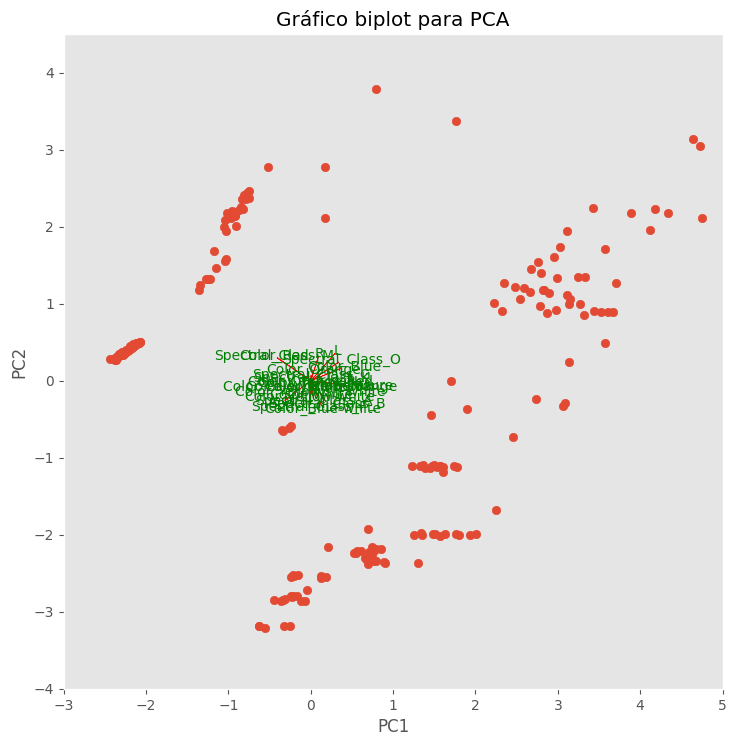

In [13]:
# Función para dibujar un gráfico biplot
def biplot(scaled_data, fitted_pca, original_dim_labels):

    pca_results = fitted_pca.transform(scaled_data)
    pca1_scores = pca_results[:,0]
    pca2_scores = pca_results[:,1]

    # plot each point in 2D post-PCA space
    plt.scatter(pca1_scores,pca2_scores)

    #for each original dimension, plot what an increase of 1 in that dimension means in this space
    for i in range(fitted_pca.components_.shape[1]):
        raw_dims_delta_on_pca1 = fitted_pca.components_[0,i]
        raw_dims_delta_on_pca2 = fitted_pca.components_[1,i]
        plt.arrow(0, 0, raw_dims_delta_on_pca1, raw_dims_delta_on_pca2 ,color = 'r',alpha = 1)
        plt.text(raw_dims_delta_on_pca1*1.1, raw_dims_delta_on_pca2*1.1, original_dim_labels[i], color = 'g', ha = 'center', va = 'center')

plt.figure(figsize=(8.5,8.5))
plt.xlim(-3,5)
plt.ylim(-4,4.5)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("Gráfico biplot para PCA")
plt.grid()
biplot(X_one_hot_scaled, PCA().fit(scaler.fit_transform(X_one_hot_scaled)),
       original_dim_labels=stars_data_one_hot.columns)

Clustering with Ordinal Encoding - Silhouette Scores:
K-Means: 0.6372391018799622
DBSCAN: 0.575508505179783
Hierarchical: 0.6254745074354278


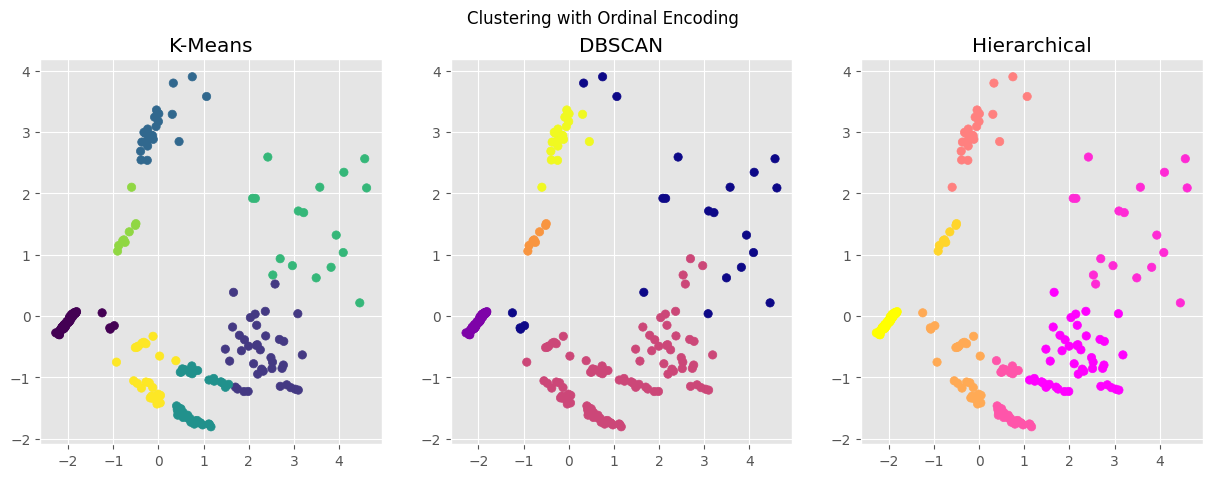

Clustering with One-Hot Encoding - Silhouette Scores:
K-Means: 0.6781226307621908
DBSCAN: 0.5927417985519686
Hierarchical: 0.6727751430867636


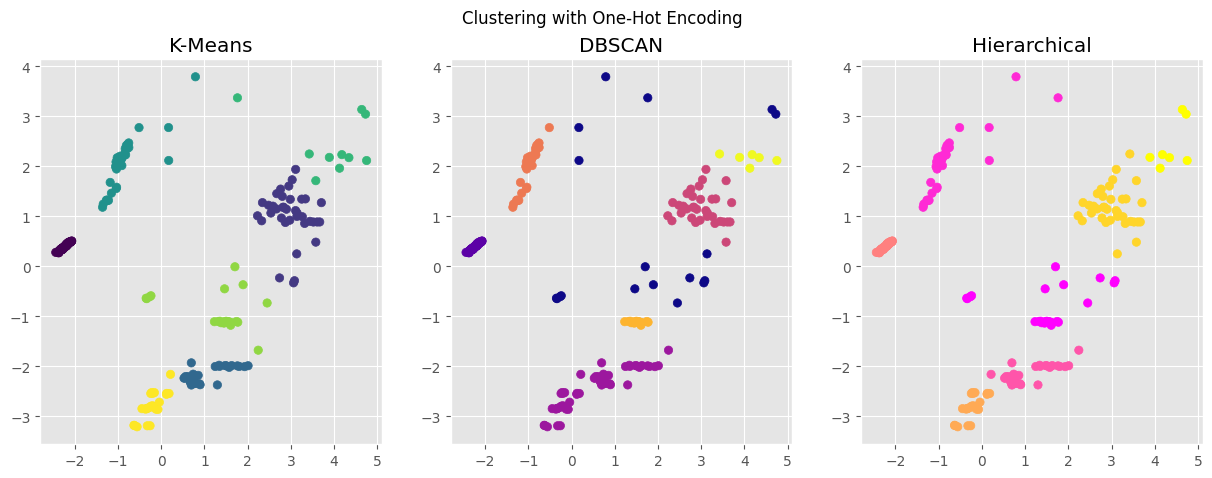

In [14]:
#PUNTO 3.	Aplicar diferentes algoritmos de clustering comparando y discutiendo los resultados que se obtienen de ellos (al menos dos métodos)

# Función para ejecutar y evaluar clustering
def evaluate_clustering(X, X_pca, N, title='Clustering Results'):
    kmeans = KMeans(n_clusters=N, n_init=25, random_state=100432070).fit(X)
    dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)
    hierarchical = AgglomerativeClustering(n_clusters=N).fit(X)
    
    # Silhouette Scores
    silhouette_kmeans = silhouette_score(X, kmeans.labels_)
    silhouette_dbscan = 'No valid clusters' if len(set(dbscan.labels_)) == 1 else silhouette_score(X, dbscan.labels_)
    silhouette_hierarchical = silhouette_score(X, hierarchical.labels_)
    
    print(f"{title} - Silhouette Scores:")
    print(f"K-Means: {silhouette_kmeans}")
    print(f"DBSCAN: {silhouette_dbscan}")
    print(f"Hierarchical: {silhouette_hierarchical}")
    
    # Visualización
    #pca = PCA(n_components=2)  # Reducir a 2 dimensiones para visualización
    #X_pca = pca.fit_transform(X)
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.title('K-Means')
    plt.subplot(132)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan.labels_, cmap='plasma')
    plt.title('DBSCAN')
    plt.subplot(133)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical.labels_, cmap='spring')
    plt.title('Hierarchical')
    plt.suptitle(title)
    plt.show()

# Evaluación de clustering con codificación ordinal
evaluate_clustering(X_ordinal_pca, X_ordinal_pca, 7, title='Clustering with Ordinal Encoding')

# Evaluación de clustering con codificación one-hot
evaluate_clustering(X_one_hot_pca, X_one_hot_pca, 7, title='Clustering with One-Hot Encoding')

""Observaciones:""

-K-Means muestra generalmente mejores Silhouette Scores, lo que indica una separación y cohesión más efectivas entre los clusters en comparación con los otros métodos.

-La codificación one-hot parece proporcionar resultados ligeramente mejores para K-Means y Hierarchical Clustering en comparación con la codificación ordinal. Esto podría deberse a que la codificación one-hot reduce el sesgo en los cálculos de distancias entre categorías, que puede ser relevante en la clasificación de estrellas basada en características físicas.

-DBSCAN muestra resultados más consistentes entre ambas codificaciones, pero con scores generalmente más bajos, lo que puede indicar que la densidad y la distribución espacial de los datos no se ajustan bien a este método en este contexto específico.


""Visualizaciones:""

-Los plots de K-Means muestran una clara segmentación de los datos en clusters bien definidos, ligeramente en la codificación one-hot respecto a la ordinal.

-DBSCAN parece identificar algunos grupos densos, pero también deja muchos datos como ruido (puntos azules), especialmente en la codificación ordinal. En la codificación one-hot, aunque en términos de score son bastante idénticos, en cuanto al gráfico parece mucho más claro el one-hot.

-Hierarchical Clustering forma clusters que parecen tener más mezcla y menos separación definida entre ellos en comparación con K-Means.


""Recomendaciones Basadas en los Resultados:""

-Preferencia por K-Means: Dado su alto rendimiento y clara definición de clusters, K-Means sería recomendable para seguir trabajando en este conjunto de datos, particularmente con codificación ordinal.

-Codificación Ordinal vs. One-Hot: La codificación one-hot parece ser preferible para este análisis debido a la mejora de los cálculos entre variables. Sin embargo, sería útil considerar análisis adicionales para confirmar si esta codificación es claramente más efectiva o puede ser que la codificación ordinal mejore sustancialmente a la one-hot con métodos que no hemos aprendido.

-Exploración Adicional con DBSCAN: Ajustar los parámetros de DBSCAN (como eps y min_samples) podría mejorar los resultados y debería explorarse si se busca un método que pueda manejar outliers de manera efectiva.

In [15]:
#PUNTO 4.	Discutir los resultados que se obtienen si a los atributos categóricos se les aplica one-hot-encoding
# o se asigna un valor numérico a las secuencias (variable ordinal).

def analyze_clustering_results(X_ordinal_scaled, X_one_hot_scaled, title='Analysis of Clustering Results'):
    # Realizar clustering con K-Means para cada tipo de codificación
    kmeans_ordinal = KMeans(n_clusters=7, random_state=100432070).fit(X_ordinal_scaled)
    kmeans_one_hot = KMeans(n_clusters=7, random_state=100432070).fit(X_one_hot_scaled)

    # Calcular Silhouette Scores
    silhouette_ordinal = silhouette_score(X_ordinal_scaled, kmeans_ordinal.labels_)
    silhouette_one_hot = silhouette_score(X_one_hot_scaled, kmeans_one_hot.labels_)

    # Imprimir los resultados
    print(f"{title}:")
    print(f"Puntuación Silhouette con Codificación Ordinal: {silhouette_ordinal}")
    print(f"Puntuación Silhouette con Codificación One-Hot: {silhouette_one_hot}")

    # Discutir los resultados basados en las puntuaciones
    if silhouette_ordinal > silhouette_one_hot:
        print("La codificación ordinal ofrece mejores resultados de agrupamiento, probablemente debido a que conserva el orden natural de las categorías.")
    else:
        print("La codificación One-Hot ofrece mejores resultados de agrupamiento, posiblemente debido a que reduce el sesgo en los cálculos de distancias entre categorías.")

# Llamar a la función de análisis después de realizar el clustering
analyze_clustering_results(X_ordinal_pca, X_one_hot_pca)


Analysis of Clustering Results:
Puntuación Silhouette con Codificación Ordinal: 0.6372391018799622
Puntuación Silhouette con Codificación One-Hot: 0.6753366962472327
La codificación One-Hot ofrece mejores resultados de agrupamiento, posiblemente debido a que reduce el sesgo en los cálculos de distancias entre categorías.


Text(0, 0.5, 'Media índices silhouette')

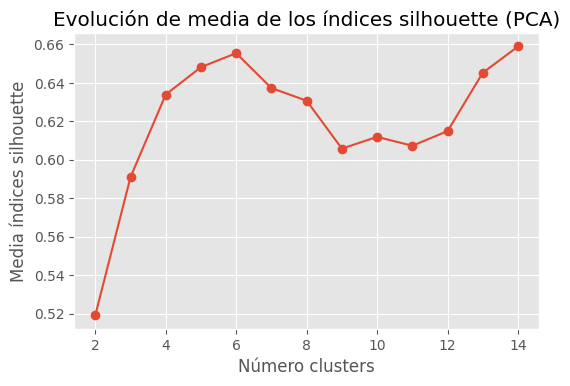

In [16]:
# Método silhouette para identificar el número óptimo de clusters (ahora con los coeficientes de la PCA)
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
valores_medios_silhouette.clear()

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 25,
        random_state = 100432070
    )
    cluster_labels = modelo_kmeans.fit_predict(X_ordinal_pca)
    silhouette_avg = silhouette_score(X_ordinal_pca, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette (PCA)")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')

Text(0, 0.5, 'Media índices silhouette')

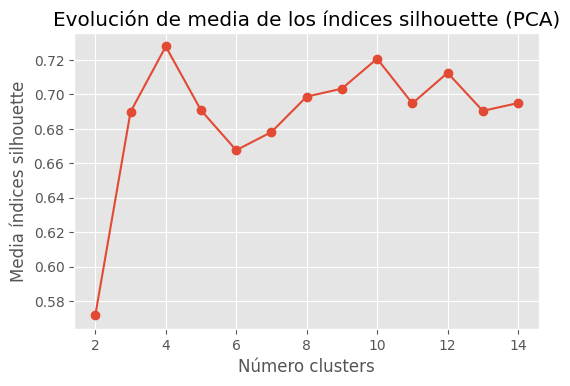

In [17]:
# Método silhouette para identificar el número óptimo de clusters (ahora con los coeficientes de la PCA)
range_n_clusters = range(2, 15)
valores_medios_silhouette.clear()

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 25,
        random_state = 100432070
    )
    cluster_labels = modelo_kmeans.fit_predict(X_one_hot_pca)
    silhouette_avg = silhouette_score(X_one_hot_pca, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette (PCA)")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')

In [18]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
medias = []
for i in (X_ordinal_pca, X_one_hot_pca):
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=100432070)
        cluster_labels = clusterer.fit_predict(i)

        # El silhouette_score da el valor medio de todas las muestras. Esto da una
        # perspectiva de la densidad y separación de los clusters formados
        silhouette_avg = silhouette_score(i, cluster_labels)
        print(
            "Para n_clusters =",
            n_clusters,
            "La media de silhouette_score es :",
            silhouette_avg,
        )
        medias.append(silhouette_avg)
    media = sum(medias)/len(medias)
    print("La media total de todos los n_clusters es :", media)    
    print()
    medias.clear()
    

Para n_clusters = 2 La media de silhouette_score es : 0.5190915196229142
Para n_clusters = 3 La media de silhouette_score es : 0.5909374913688876
Para n_clusters = 4 La media de silhouette_score es : 0.6338962241025694
Para n_clusters = 5 La media de silhouette_score es : 0.6487145110620592
Para n_clusters = 6 La media de silhouette_score es : 0.6553807800665884
Para n_clusters = 7 La media de silhouette_score es : 0.6372391018799622
Para n_clusters = 8 La media de silhouette_score es : 0.6306815152282736
Para n_clusters = 9 La media de silhouette_score es : 0.6048611372338447
Para n_clusters = 10 La media de silhouette_score es : 0.5903246549939115
Para n_clusters = 11 La media de silhouette_score es : 0.6072392150649997
Para n_clusters = 12 La media de silhouette_score es : 0.6148635964003167
Para n_clusters = 13 La media de silhouette_score es : 0.6177050072724225
Para n_clusters = 14 La media de silhouette_score es : 0.6569440288479435
La media total de todos los n_clusters es : 0.

Según las distintas evaluaciones de rendimiento que hemos realizado tanto con la codificación ordinal como con la codificación one hot, podemos concluir que claramente la codificación one-hot ofrece mejores resultados de rendimiento que la codificaión ordinal. Después de generar los gráficos de los diferentes algoritmos de clustering (kmeans, dbscan y hierarchical), que posicicionaban al onehot mejor que a la ordinal, hemos hecho estudios de los índices silhouette y sus respectivas medias, confirmando a la codificación one-hot como más efectiva, al menos, en este problema.

Nosotros en un principio pensabábamos que por la naturaleza de las variables físicas Color y Clase Epectral, rendiría mejor con una codificación ordinal, la cual creemos que conserva mejor el orden natural de las categorías categóricas, y con ello su score. Sin embargo, tras aplicar PCA hemos visto que no era así.

Silhouette Score: 0.6644068493286582


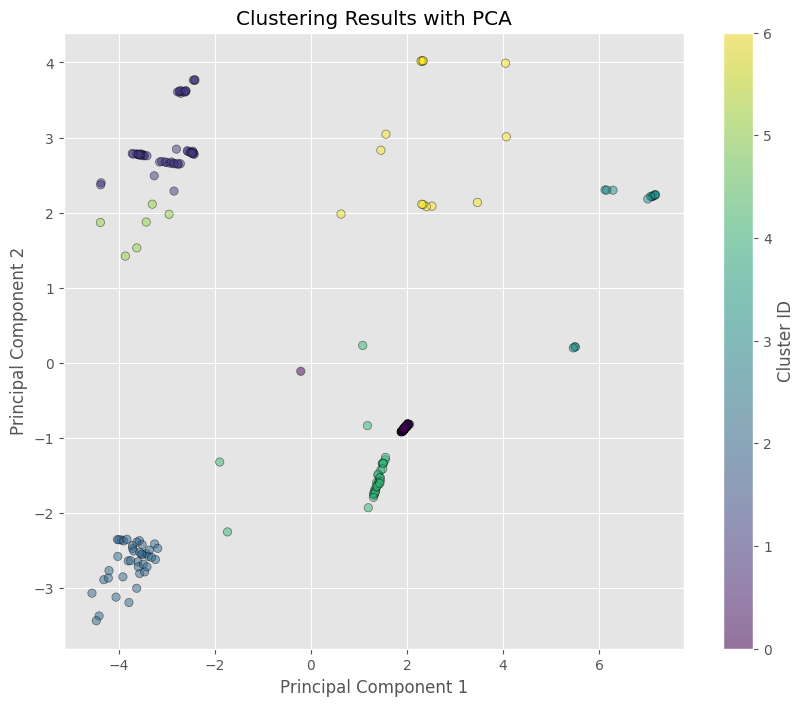

In [19]:
#PUNTO 5.	A partir de los resultados obtenidos, ¿qué pipeline de clustering, es decir, qué transformaciones de datos, algoritmo, con sus hiperparámetros, transformación de datos y 
#análisis de resultados recomendaría realizar?

# Codificación de variables categóricas
le = LabelEncoder()
stars_data['Color'] = le.fit_transform(stars_data['Color'])
stars_data['Spectral_Class'] = le.fit_transform(stars_data['Spectral_Class'])

# Normalización de las características numéricas
scaler = StandardScaler()
features_to_scale = ['Temperature', 'L', 'R', 'A_M']
stars_data[features_to_scale] = scaler.fit_transform(stars_data[features_to_scale])

# Algoritmo de clustering: K-Means
kmeans = KMeans(n_clusters=7, random_state=100432070)
clusters = kmeans.fit_predict(stars_data[features_to_scale + ['Color', 'Spectral_Class']])

# Evaluación del clustering
silhouette = silhouette_score(stars_data[features_to_scale + ['Color', 'Spectral_Class']], clusters)
print(f"Silhouette Score: {silhouette}")

# Visualización de los resultados de clustering con PCA
pca = PCA(n_components=2)
stars_data_pca = pca.fit_transform(stars_data[features_to_scale + ['Color', 'Spectral_Class']])
plt.figure(figsize=(10, 8))
plt.scatter(stars_data_pca[:, 0], stars_data_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5, edgecolor='k')
plt.title('Clustering Results with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster ID')
plt.show()

#PUNTO 6.   ¿Hay similitudes con los grupos obtenidos en el punto 4? Explicar

Similitudes:

-Separación de Clusters: Ambos métodos muestran una clara separación de algunos clusters, indicando grupos bien definidos que probablemente reflejan diferencias significativas en términos de las propiedades físicas de las estrellas (como temperatura y luminosidad).

-Presencia de Clusters Densos: En ambos casos, hay grupos densamente poblados, lo que puede indicar que existen subpoblaciones de estrellas con características muy similares.

-Diferencias entre clusters: Hay algunas simlitudes y diferencias entre las formas de los clusters, lo que nos lleva a concluir que hay algunos grupos de estrellas más delimitados, específicos y compactados, mientras que en otros hay más amplitud entre extremos.

-Comparación con los 7 grupos originales: Si comparamos con las 7 clases originales del enunciado, apreciamos que hay clusters muy bien definidos y clusters con outliers. Esto puede explicarse ya sea por el punto anterior, por que la propia estrella no pretenece perfectamente a una única categoría, porque debería pertenecer a otro subclase, o porque nos hemos podido equivocar en algo. De la misma manera, los índices de silhouette resaltan que se obtienen scores más elevados según aumentamos el número de clusters de los 7 "originales". Quizá de esta manera obtendríamos menos outliers pero no obtendríamos las 7 clases de estrellas según la astronomía.